In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [28]:
mnist = tf.keras.datasets.mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = mnist.load_data()
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
num = 10

### conv init

In [29]:
model = tf.keras.models.load_model('./mnist.h5')
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[5 0 4 1 9 2 1 3 1 4]
 * Prediction,  [0 0 0 0 0 0 0 0 0 0]


### with batch

In [30]:
model = tf.keras.models.load_model('./mnist_batch.h5')
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[5 0 4 1 9 2 1 3 1 4]
 * Prediction,  [5 0 4 1 9 2 1 3 1 4]


### Relu 

In [31]:
model = tf.keras.models.load_model('./mnist_relu.h5')
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[5 0 4 1 9 2 1 3 1 4]
 * Prediction,  [5 0 4 1 9 2 1 3 1 4]


### View graph

In [32]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
historyNoBatch = pickle.load(open('./historyNoBatch', "rb"))
historyBatch = pickle.load(open('./historyBatch', "rb"))
historylelu = pickle.load(open('./historyBatchReLu', "rb"))
val_accNB = historyNoBatch["val_accuracy"]
val_lossNB= historyNoBatch["val_loss"]
val_lossB = historyBatch["val_loss"]
val_accB = historyBatch["val_accuracy"]
val_lossL = historylelu["val_loss"]
val_accL = historylelu["val_accuracy"]

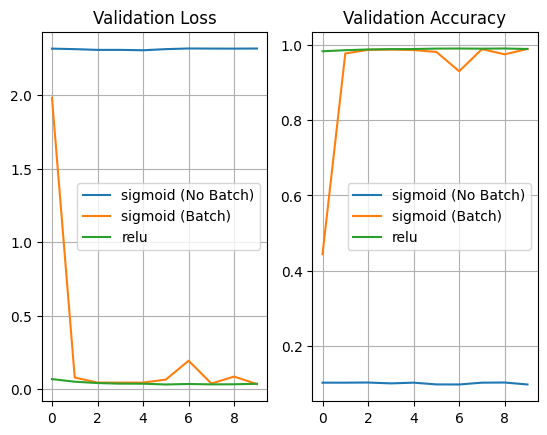

In [33]:
plt.subplot(1,2,1)
plt.title('Validation Loss')
plt.plot(range(len(val_lossNB)),val_lossNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_lossB)),val_lossB,label = "sigmoid (Batch)")
plt.plot(range(len(val_lossL)),val_lossL,label = "relu")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Accuracy')
plt.plot(range(len(val_accNB)),val_accNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_accB)),val_accB,label = "sigmoid (Batch)")
plt.plot(range(len(val_accL)),val_accL,label = "relu")
plt.grid()
plt.legend()
plt.savefig("Summary.png")
plt.show()